<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
import xlrd
import matplotlib.pyplot as plt
import seaborn as sb
import keras

In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
no_col =len(raw_data.columns)
for i in range(0, no_col):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,no_col):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [8]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [9]:
# Look at output data
print(raw_data.iloc[:, -1].values)

['recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'no-recurrence-events' 'recurrence-events' 'no-re

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [10]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print(sum(code_rows)/no_rows) 

0.2972027972027972


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [11]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid dat entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [12]:
# Correct date types in 'tumor-size' and 'inv-nodes' variables
for i in range(0, len(raw_data)):
    if type(raw_data['tumor-size'][i]) is not str:
        if raw_data['tumor-size'][i].day == 1:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].month) +'-' + str(raw_data['tumor-size'][i].year-2000)
        else:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].day) + '-' + str(raw_data['tumor-size'][i].month)
    if type(raw_data['inv-nodes'][i]) is not str:
        if raw_data['inv-nodes'][i].day == 1:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].month) + '-' + str(raw_data['inv-nodes'][i].year-2000)
        else:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].day) + '-' + str(raw_data['inv-nodes'][i].month)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [13]:
# Remove all rows containing ? data
indx = raw_data[raw_data.isin(['?'])].stack(dropna=True).unstack().index
print(f"indx: {indx}")
raw_data = raw_data.drop(index=indx)

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


In [14]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(raw_data, [len(raw_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]

# Handle categorical values and drop dummy variable
# Remove non-categorical data
dm = X.pop('deg-malig')
# Encode the catagorical data (dummy variables)
proc_X = pd.get_dummies(data=X, prefix_sep='_', drop_first=True)
# Add back in non-categorical data
proc_X.insert(0, 'deg-malig', dm)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_X, y, test_size = 0.25, random_state = 1)

In [15]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [16]:
class Module4_Model:
    
    def __init__(self):
        self.model = None

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """         
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(test_df)
        return processed_df



In [17]:
# Dont change
my_model = Module4_Model()

In [18]:
# Dont change
x_train_processed = my_model.preprocess_training_data(X_train)

In [19]:
# Encode the output data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.DataFrame(lb.fit_transform(y_train))
y_test = pd.DataFrame(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Create a model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,PReLU,Dropout

classifier = Sequential()
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [27]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 288       
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________


In [28]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [30]:
# Train your model
# Fitting the ANN to the training set
model = classifier.fit(x_train_processed,y_train,batch_size=100,epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 435ms/step - loss: 0.6603 - accuracy: 0.6232
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.6280
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6394 - accuracy: 0.6570
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.6570
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6236 - accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6715
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6860
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6002 - accuracy: 0.7101
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5935 - accuracy: 0.7150
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5875 - accuracy: 0.7391
Epoch 11/100
3/3 [=========

In [32]:
# use your model to make a prediction on unseen data
y_pred = classifier.predict(x_test_processed)
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


Accuracy: 61.43 %
Weighted ROC AUC accuracy: 52.76 %
Confusion matrix:


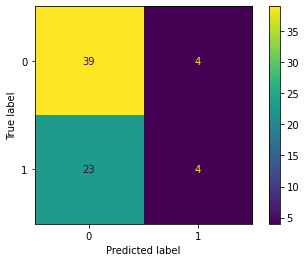

In [36]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(score*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
# from sklearn.model_selection import cross_val_score
# from numpy import ravel
# accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
# print("K-fold cross validation results")
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Visualise the loss and accuracy for each epoch

dict_keys(['loss', 'accuracy'])


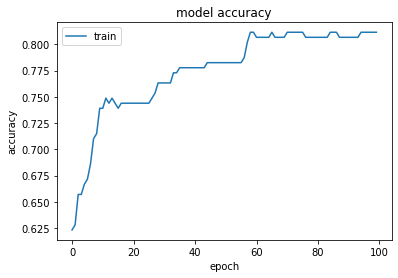

In [37]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

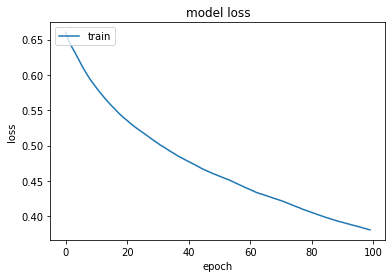

In [38]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is low (<15%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)